In [1]:
!pip install rasterio

# Inventario


In [4]:
#Libreria
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(19705,)

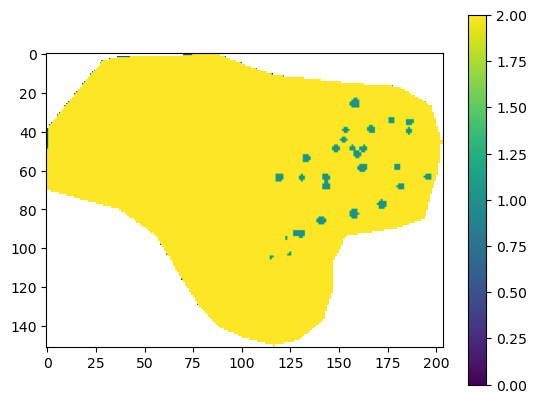

In [5]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario>=3,np.nan,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [6]:
np.unique(inventario)#para conocer los numeros almacenados en el raster
     

array([ 0.,  1.,  2., nan])

# Método Bivariado

In [8]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #libreria para graficar
from pandas import DataFrame
import statsmodels.graphics.api as smg #libreria de estadistica
     

(19705,)

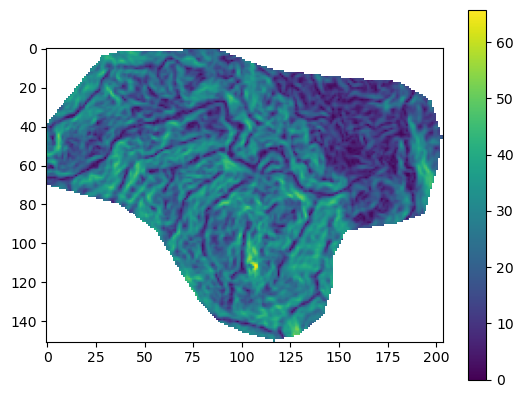

In [9]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
plt.imshow(pendiente)
plt.colorbar()
pendiente_vector_MenM.shape
     

In [10]:
print(type(pendiente_vector_MenM))
print(pendiente_vector_MenM)
     

<class 'numpy.ndarray'>
[20.83282  21.867115 20.780851 ...  7.455642 32.32441  26.939585]


In [18]:
pendiente_serie=pd.Series(pendiente_vector_MenM)
ap=bp=cp=dp=ep=fp=0
for row in pendiente_serie:
        if (0 <= row) & (row < 5):
          ap+=1
        elif (5 <= row) & (row < 10):
          bp+=1
        elif (10 <= row) & (row < 15):
          cp+=1
        elif (15 <= row) & (row < 30):
          dp+=1
        elif (33 <= row) & (row < 47):
          ep+=1
        if (row>=47):
          fp+=1

totalp=ap+bp+cp+dp+ep
print("total:", totalp,ap,bp,cp,dp,ep,fp)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM
ap1=bp1=cp1=dp1=ep1=fp1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 5):
          ap1+=1
        elif (5 <= row) & (row < 10):
          bp1+=1
        elif (10 <= row) & (row < 15):
          cp1+=1
        elif (15 <= row) & (row < 30):
          dp1+=1
        elif (33 <= row) & (row < 47):
          ep1+=1
        if (row>=47):
          fp1+=1

total1p=ap1+bp1+cp1+dp1+ep1+fp1
print("total1:", total1p,ap1,bp1,cp1,dp1,ep1,fp1)

total: 17746 655 1711 2502 9751 3127 67
total1: 18808 185 527 735 3525 4364 9472


In [19]:
w_a=(ap1/total1p)/(ap/totalp)
w_b=(bp1/total1p)/(bp/totalp)
w_c=(cp1/total1p)/(cp/totalp)
w_d=(dp1/total1p)/(dp/totalp)
w_e=(ep1/total1p)/(ep/totalp)
w_f=(fp1/total1p)/(fp/totalp)
print(w_a,w_b,w_c,w_d,w_e, w_f)
#se cambio total1 por total1p y total pot totalp, verificar si es correcto#

0.2664945240128449 0.2906152945847186 0.27717744987336373 0.3410890880936161 1.3167845484036962 133.39045309395178


[  0.2664945    0.27717745   0.2906153    0.3410891    1.3167845
 133.39046             nan]


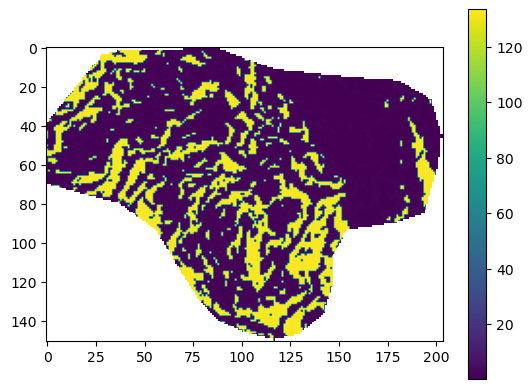

In [21]:
pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<2.5 )),w_a,pendiente );
pendiente_re=np.where ( (np.logical_and (pendiente_re>=2.5, pendiente_re<5 )),w_b,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=5, pendiente_re<8 )),w_c,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=8, pendiente_re<15 )),w_d,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=15, pendiente_re<30 )),w_e,pendiente_re);
pendiente_re=np.where ( pendiente_re>=30,w_f,pendiente_re);
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();
     

(19705,)

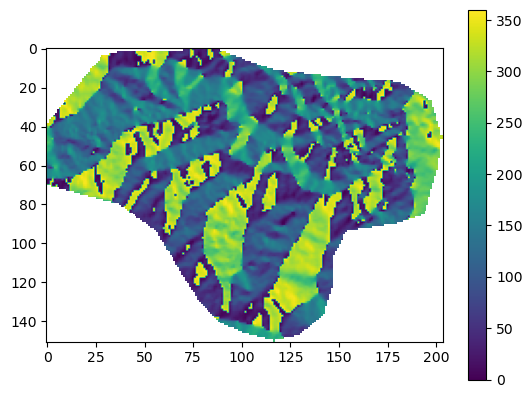

In [22]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

In [24]:
aspecto_serie=pd.Series(aspecto_vector_MenM)
aa=ba=ca=da=ea=0
for row in aspecto_serie:
        if (0 <= row) & (row < 75):
          aa+=1
        elif (75 <= row) & (row < 180):
          ba+=1
        elif (180 <= row) & (row < 275):
          ca+=1
        elif (275 <= row) & (row < 300):
          da+=1
        if (row>=300):
          ea+=1

totala=aa+ba+ca+da+ea
print("total:", totala,aa,ba,ca,da,ea)

aspectoconMenM=aspecto_vector_MenM*inventario_vector_MenM
aa1=ba1=ca1=da1=ea1=0
for row in aspectoconMenM:
        if (0 < row) & (row < 75):
          aa1+=1
        elif (75 <= row) & (row < 180):
          ba1+=1
        elif (180 <= row) & (row < 275):
          ca1+=1
        elif (275 >= row) & (row < 300):
          da1+=1
        if (row>=300):
          ea1+=1

total1a=aa1+ba1+ca1+da1+ea1
print("total1:", total1a,aa1,ba1,ca1,da1,ea1)

w_a=(aa1/total1a)/(aa/totala)
w_b=(ba1/total1a)/(ba/totala)
w_c=(ca1/total1a)/(ca/totala)
w_d=(da1/total1a)/(da/totala)
w_e=(ea1/total1a)/(ea/totala)
print("w:", w_a,w_b,w_c,w_d,w_e)


total: 19705 5330 6933 2312 1087 4043
total1: 18796 2427 4025 3413 92 8839
w: 0.4773682936012492 0.6086332681025302 1.5476026381597792 0.08872975576827108 2.2919777401446897


[0.08872975 0.4773683  0.6086333  1.5476027  2.2919776         nan]


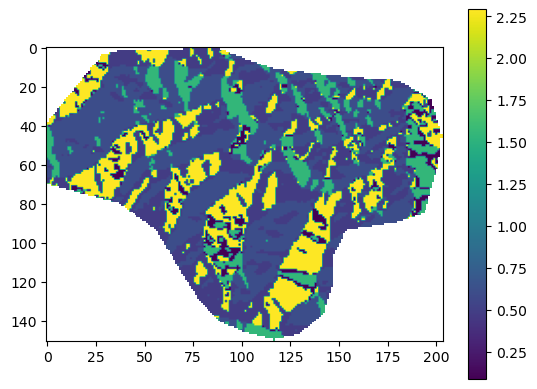

In [25]:
aspecto_re=np.where ( (np.logical_and (aspecto>=0, aspecto<75 )),w_a,aspecto );
aspecto_re=np.where ( (np.logical_and (aspecto_re>=75, aspecto_re<180 )),w_b,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=180, aspecto_re<275 )),w_c,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=275, aspecto_re<300 )),w_d,aspecto_re);
aspecto_re=np.where ( aspecto_re>=300,w_e,aspecto_re);
print(np.unique(aspecto_re));
plt.imshow(aspecto_re);
plt.colorbar();
     

(19705,)

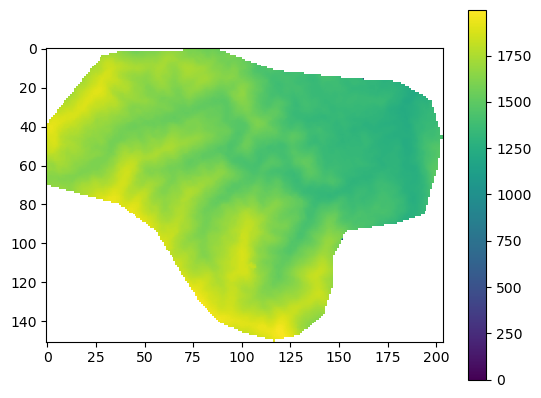

In [26]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/elev_final1.tif?raw=true')
elevacion=raster.read(1)
elevacion=np.where(elevacion<0,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

In [30]:
elevacion_serie=pd.Series(elevacion_vector_MenM)
aa=ba=ca=da=ea=0
for row in elevacion_serie:
        if (0 <= row) & (row < 1000):
         aa+=1
        elif (1000 <= row) & (row < 1438):
          ba+=1
        elif (1438 <= row) & (row < 1688):
          ca+=1
        elif (1688 <= row) & (row < 1708):
          da+=1
        if (row>=1708):
          ea+=1

totala=aa+ba+ca+da+ea
print("total:", totala,aa,ba,ca,da,ea)

elevacionconMenM=elevacion_vector_MenM*inventario_vector_MenM
aa1=ba1=ca1=da1=ea1=0
for row in elevacionconMenM:
        if (0 < row) & (row < 1000):
          aa1+=1
        elif (1000 <= row) & (row < 1438):
          ba1+=1
        elif (1438 <= row) & (row < 1688):
          ca1+=1
        elif (1688 >= row) & (row < 1708):
          da1+=1
        if (row>=1708):
          ea1+=1

total1a=aa1+ba1+ca1+da1+ea1
print("total1:", total1a,aa1,ba1,ca1,da1,ea1)

w_a=(aa1/total1a)/(aa/totala)
w_b=(ba1/total1a)/(ba/totala)
w_c=(ca1/total1a)/(ca/totala)
w_d=(da1/total1a)/(da/totala)
w_e=(ea1/total1a)/(ea/totala)
print("w:", w_a,w_b,w_c,w_d,w_e)

total: 19705 2 5525 8185 816 5177
total1: 19705 0 261 49 53 19342
w: 0.0 0.04723981900452489 0.005986560781918142 0.06495098039215685 3.7361406219818427


[0.         0.00598656 0.04723982 0.06495098 3.73614062        nan]


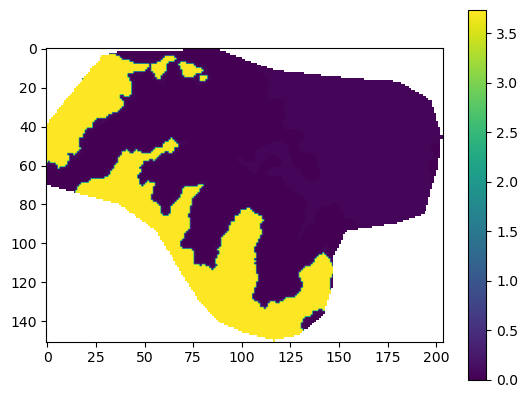

In [31]:
elevacion_re=np.where ( (np.logical_and (elevacion>=0,elevacion<1000 )),w_a,elevacion );
elevacion_re=np.where ( (np.logical_and (elevacion_re>=1000, elevacion_re<1438 )),w_b,elevacion_re);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=1438, elevacion_re<1688 )),w_c,elevacion_re);
elevacion_re=np.where ( (np.logical_and (elevacion_re>=1688, elevacion_re<1708 )),w_d,elevacion_re);
elevacion_re=np.where ( elevacion_re>=1708,w_e,elevacion_re);
print(np.unique(elevacion_re));
plt.imshow(elevacion_re);
plt.colorbar();

(19705,)

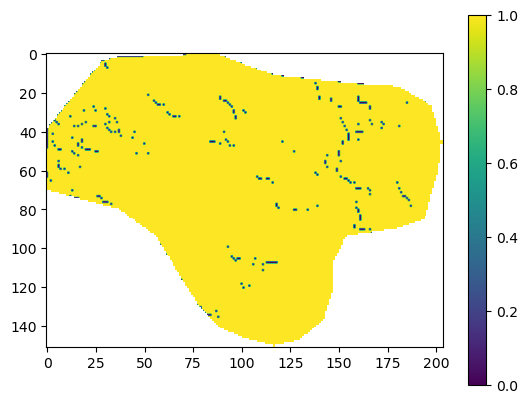

In [32]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Cobert_final1.tif?raw=true')
cobertura=raster.read(1)
cobertura=np.where(cobertura>=3,np.nan,cobertura)
cobertura_vector=cobertura.ravel()
cobertura_vector_MenM=cobertura_vector[~np.isnan(cobertura_vector)]
plt.imshow(cobertura)
plt.colorbar()
cobertura_vector_MenM.shape

In [62]:
cobertura_serie=pd.Series(cobertura_vector_MenM)
aa=ba=ca=da=0
for row in cobertura_serie:
        if (0 <= row) & (row < 0.2):
         aa+=1
        elif (0.2 <= row) & (row < 0.4):
         ba+=1
        elif (0.4 <= row) & (row < 0.8):
         ca+=1
        if (row>=0.8):
         da+=1

totala=aa+ba+ca+da
print("total:", totala,aa,ba,ca)

coberturaconMenM=cobertura_vector_MenM*inventario_vector_MenM
aa1=ba1=ca1=0
for row in coberturaconMenM:
         if (0 <= row) & (row < 0.2):
          aa1+=1
         elif (0.2 <= row) & (row < 0.4):
          ba1+=1
         elif (0.4 <= row) & (row < 0.8):
          ca1+=1
         if (row>=0.8):
          da1+=1
total1a=aa1+ba1+ca1+da1
print("total1:", total1a,aa1,ba1,ca1)

w_a=(aa1/total1a)/(aa/totala)
w_b=(ba1/total1a)/(ba/totala)
w_c=(ca1/total1a)/(ca/totala)
print("w:", w_a,w_b,w_c)

total: 19705 305 0 0
total1: 19705 309 0 0


ZeroDivisionError: float division by zero

[0.00598656        nan]


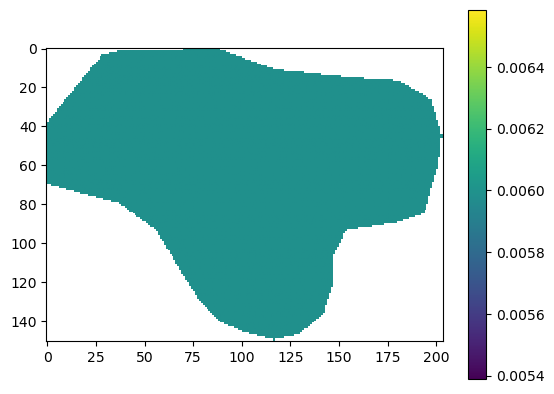

In [54]:
cobertura_re=np.where ( (np.logical_and (cobertura>=0,cobertura<0.4 )),w_a,cobertura );
cobertura_re=np.where ( (np.logical_and (cobertura_re>=0.4, cobertura_re<0.8 )),w_b,cobertura_re);
cobertura_re=np.where ( cobertura_re>=0.8,w_c,cobertura_re);
print(np.unique(cobertura_re));
plt.imshow(cobertura_re);
plt.colorbar();

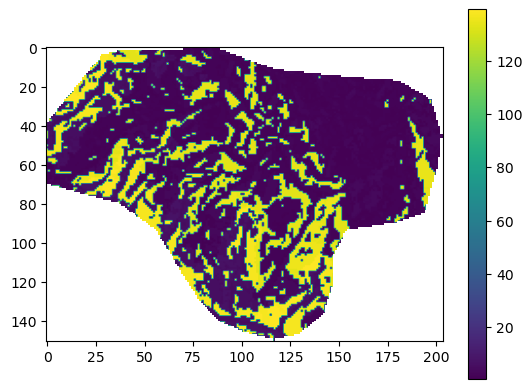

In [67]:
IS=pendiente_re+aspecto_re+elevacion_re+cobertura_re
plt.imshow(IS);
plt.colorbar();